In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


In [8]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 1000, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

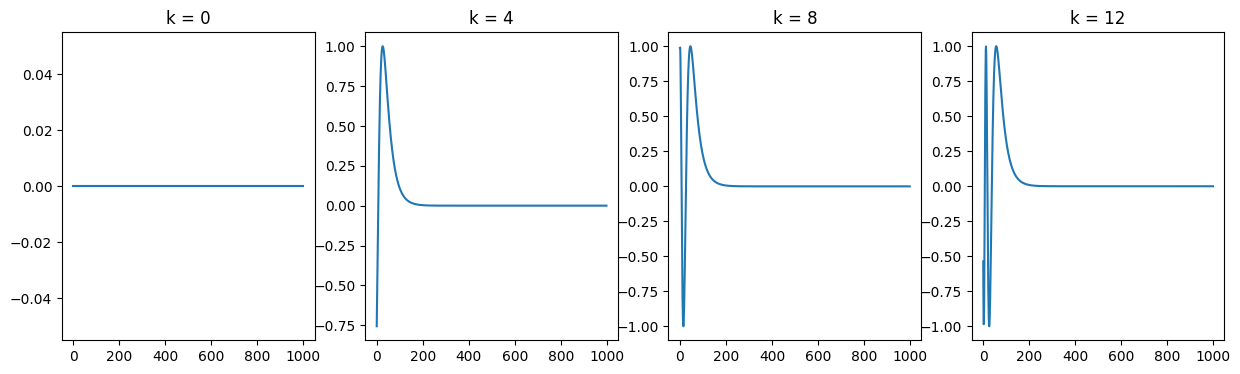

In [11]:
fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

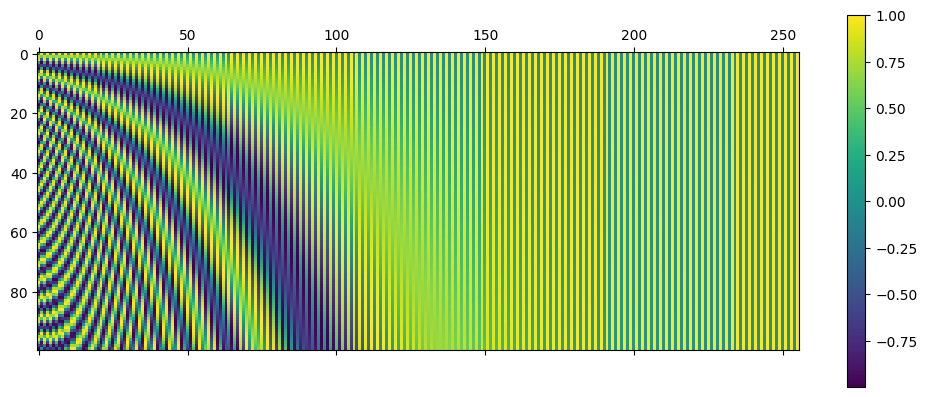

In [58]:
P = getPositionEncoding(seq_len=100, d=256, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
plt.show()

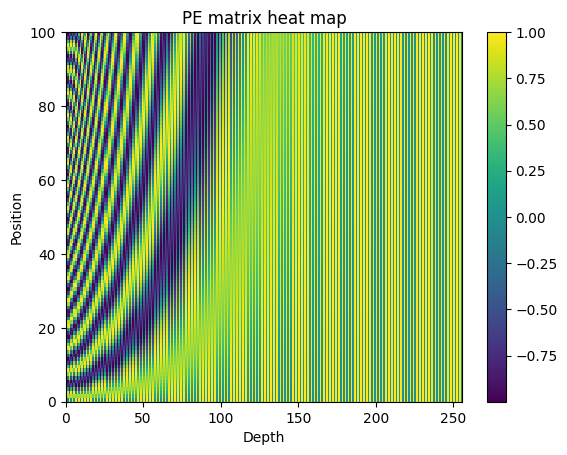

In [64]:
#### Numpy version ####
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc
    
### Plotting ####
d_model = 256
max_pos = 100
mat = positional_encoding(max_pos, d_model)
plt.pcolormesh(mat)
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()